In [1]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

In [3]:
for _,dirnames, filenames in os.walk('C:\\Users\\ajaym\\Desktop\\ML_projects\\student_performance_indicator_project\\Data'):
    for files in filenames:
        print(files)

archive.zip
EDA.ipynb
Raw_data.csv
EDA-checkpoint.ipynb


In [4]:
# loading the data


df = pd.read_csv('Raw_data.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
print('unique categories in gender : ', df.gender.unique())
print('unique categories in race/ethnicity : ', df['race/ethnicity'].unique())
print('unique categories in parental level of education : ', df['parental level of education'].unique())
print('unique categories in lunch : ', df.lunch.unique())
print('unique categories in test preparation course : ', df['test preparation course'].unique())

unique categories in gender :  ['female' 'male']
unique categories in race/ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
unique categories in parental level of education :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique categories in lunch :  ['standard' 'free/reduced']
unique categories in test preparation course :  ['none' 'completed']


In [13]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
numeric_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categoric_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

print('the number of numeric_columns are {} = {}'.format(len(numeric_columns),numeric_columns))
print('the number of categoric_columns are {} = {}'.format(len(categoric_columns),categoric_columns))

the number of numeric_columns are 3 = ['math score', 'reading score', 'writing score']
the number of categoric_columns are 5 = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']

df['average'] = df['Total_score']/3

In [17]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
reading_full_score = df[df['reading score'] == 100]
writing_full_score = df[df['writing score'] == 100]
math_full_score = df[df['math score'] == 100]

print('number of students secured full score in reading : ', format(len(reading_full_score)))
print('number of students secured full score in writing : ', format(len(writing_full_score)))
print('number of students secured full score in math : ', format(len(math_full_score)))

number of students secured full score in reading :  17
number of students secured full score in writing :  14
number of students secured full score in math :  7


In [19]:
reading_less_score = df[df['reading score'] <= 35]
writing_less_score = df[df['writing score'] <= 35]
math_less_score = df[df['math score'] <= 35]

print('number of students secured less than 35 score in reading : ', format(len(reading_less_score)))
print('number of students secured less than 35 score in writing : ', format(len(writing_less_score)))
print('number of students seucred less than 35 score in math : ', format(len(math_less_score)))

number of students secured less than 35 score in reading :  15
number of students secured less than 35 score in writing :  18
number of students seucred less than 35 score in math :  27


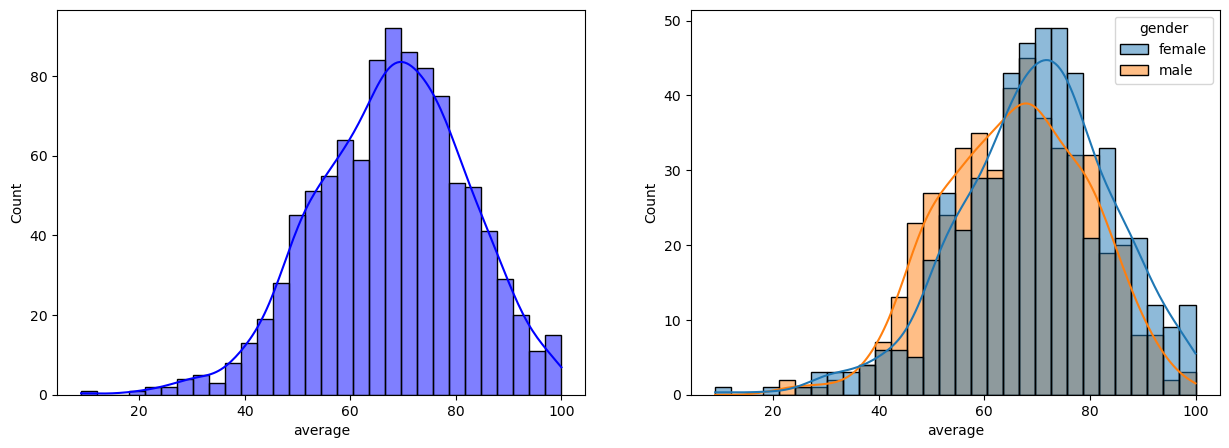

In [20]:
plt.subplots(1, 2, figsize = (15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'blue')
plt.subplot(122)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, hue = 'gender')
plt.show()

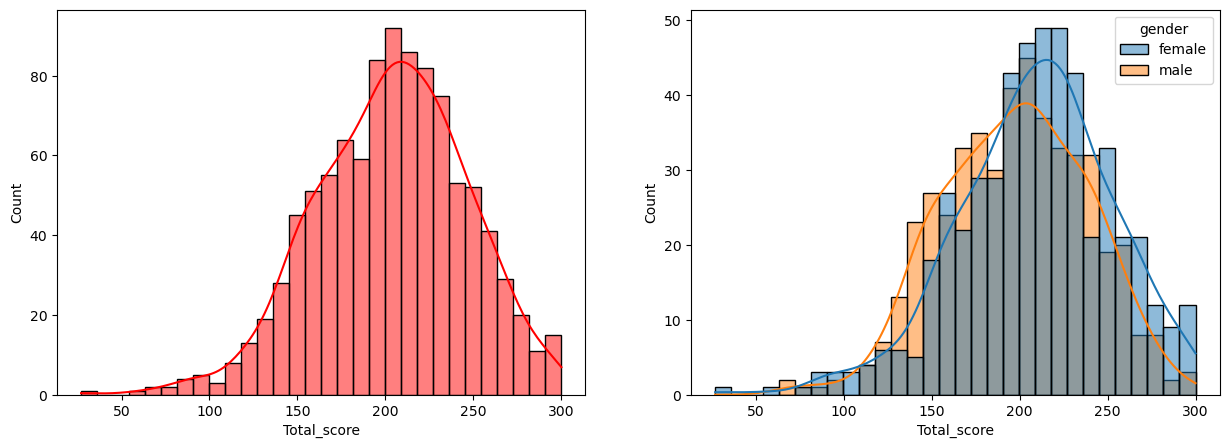

In [21]:
plt.subplots(1, 2, figsize = (15, 5))
plt.subplot(121)
sns.histplot(data = df, x = 'Total_score', bins = 30, kde = True, color = 'red')
plt.subplot(122)
sns.histplot(data = df, x = 'Total_score', bins = 30, kde = True, hue = 'gender')
plt.show()

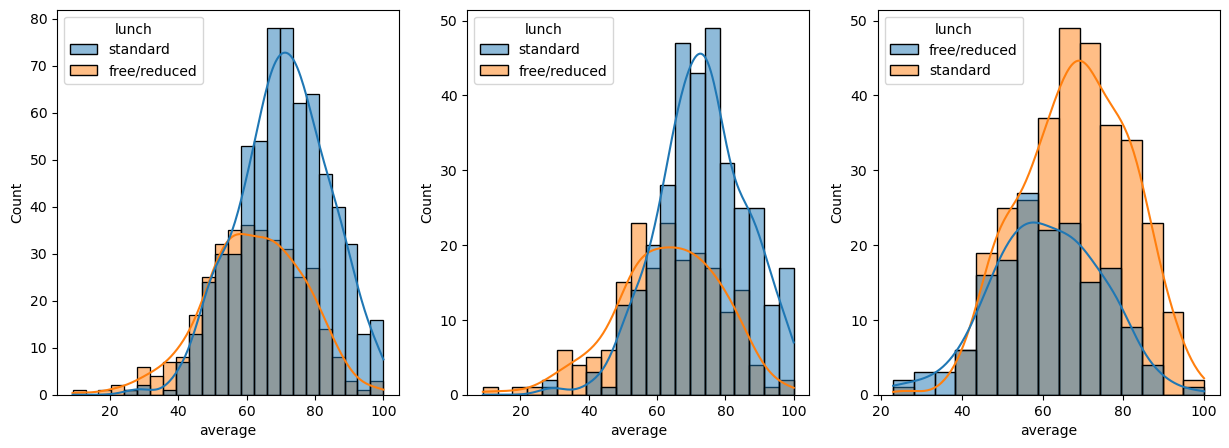

In [22]:
plt.subplots(1, 3, figsize = (15, 5))
plt.subplot(131)
sns.histplot(data = df, x = 'average', hue = 'lunch', kde = True)
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average', hue = 'lunch', kde = True)
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average', hue = 'lunch', kde = True)
plt.show()

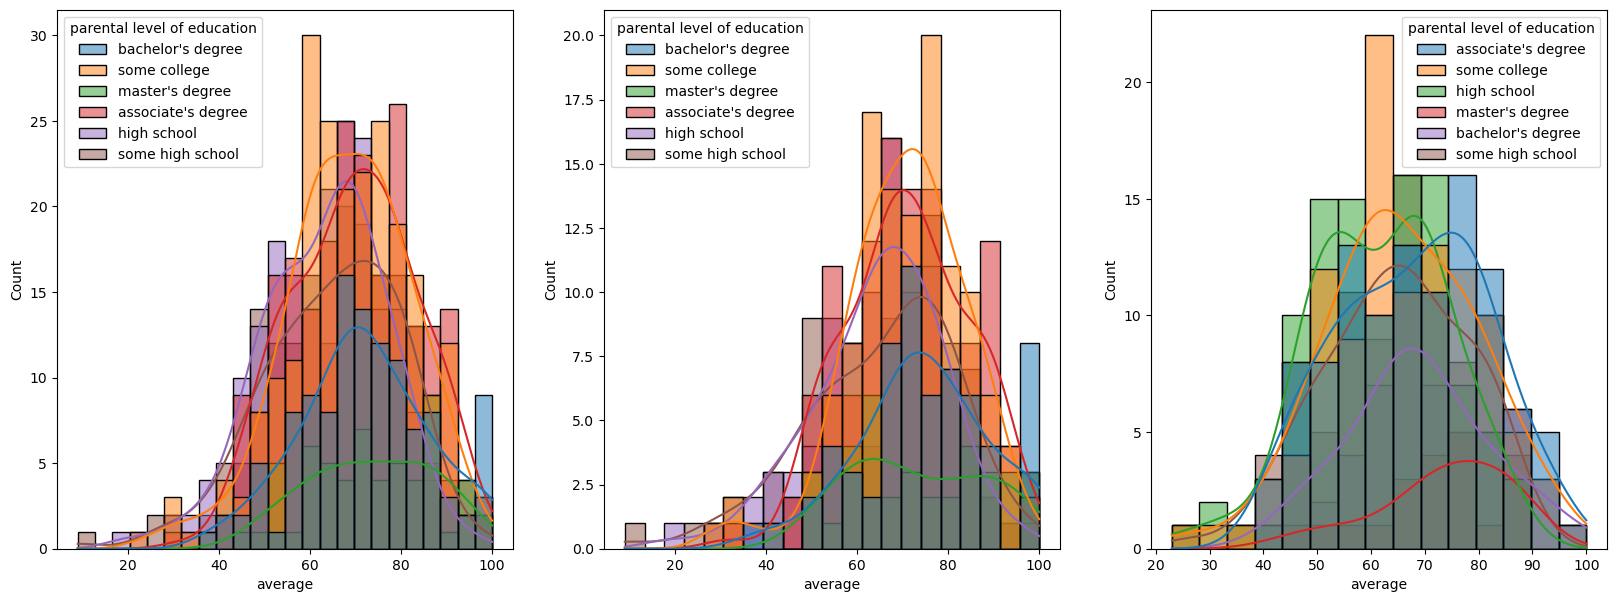

In [23]:
plt.subplots(1, 3 , figsize = (20, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

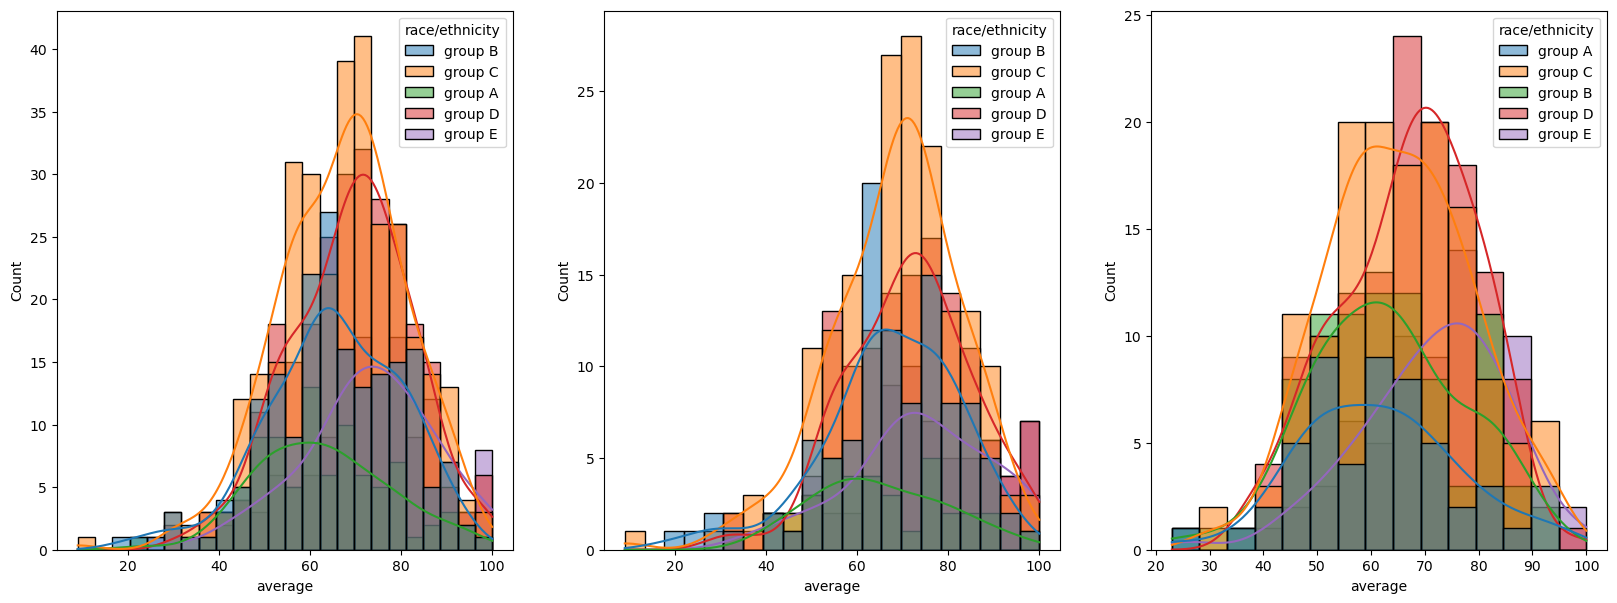

In [24]:
plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

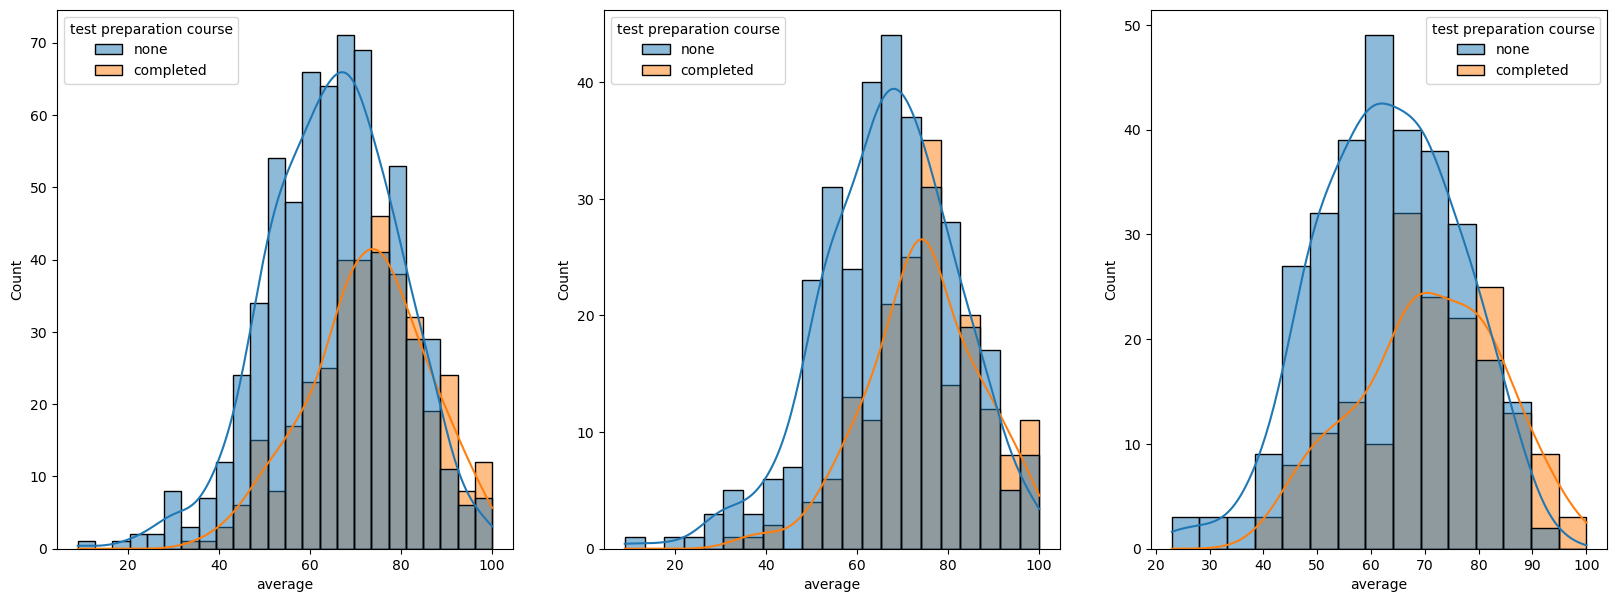

In [25]:
plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'test preparation course')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'test preparation course')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'male'], x = 'average' , kde = True, hue = 'test preparation course')
plt.show()

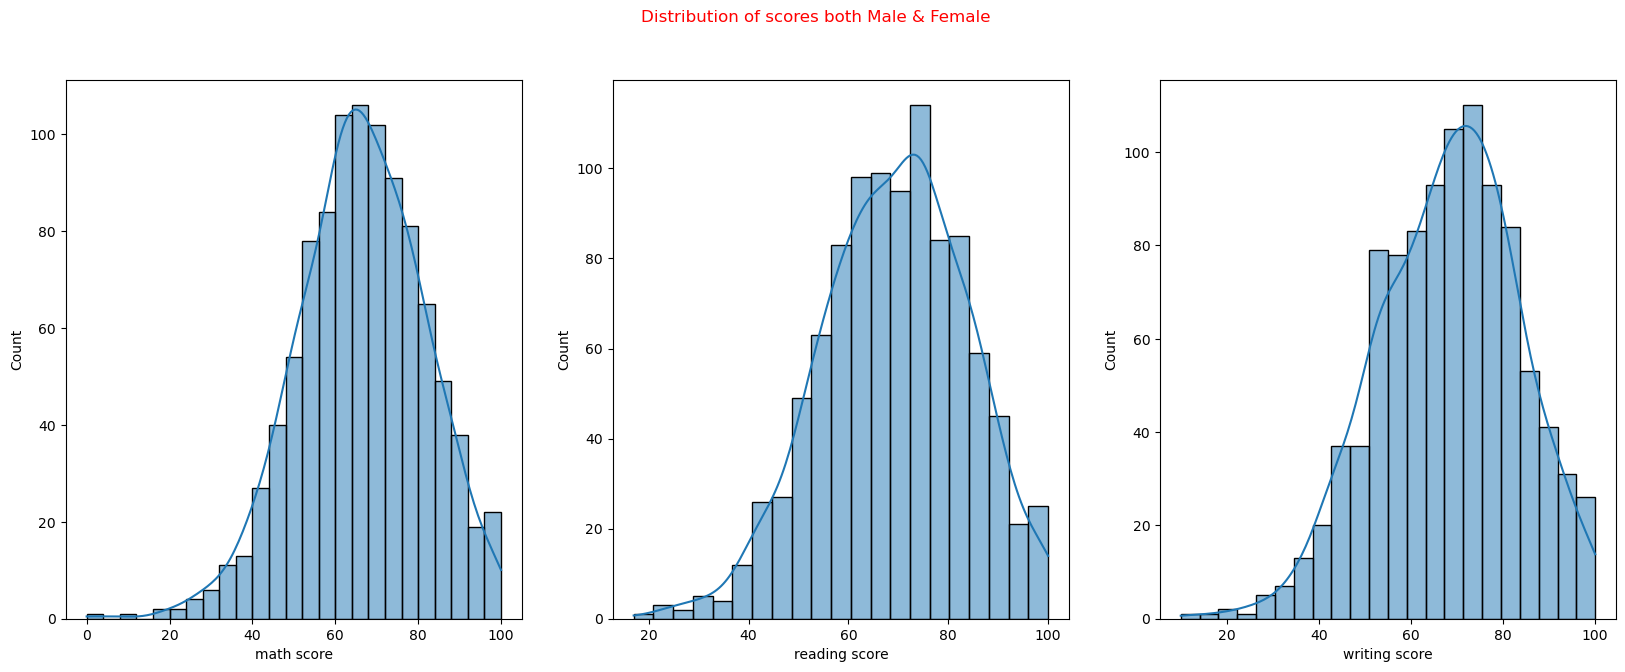

In [26]:
plt.subplots(1, 3, figsize = (20, 7))
plt.suptitle('Distribution of scores both Male & Female', color = 'r')
plt.subplot(131)
sns.histplot(data = df, x = 'math score', kde = True)
plt.subplot(132)
sns.histplot(data = df,  x = 'reading score',  kde = True)
plt.subplot(133)
sns.histplot(data = df, x = 'writing score', kde = True)
plt.show()

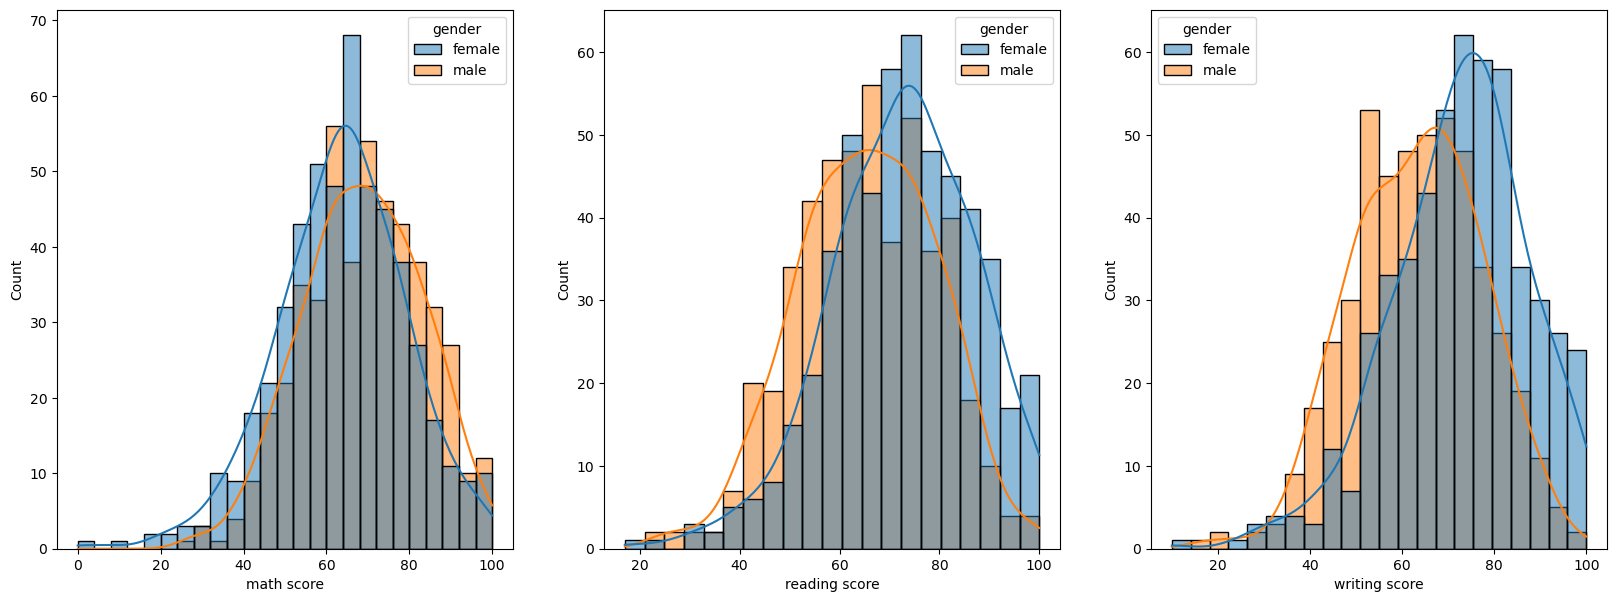

In [27]:
plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(131)
sns.histplot(data =df, x = 'math score', kde = True, hue = 'gender')
plt.subplot(132)
sns.histplot(data = df, x = 'reading score', kde = True, hue = 'gender')
plt.subplot(133)
sns.histplot(data = df, x = 'writing score', kde = True, hue = 'gender')
plt.show()

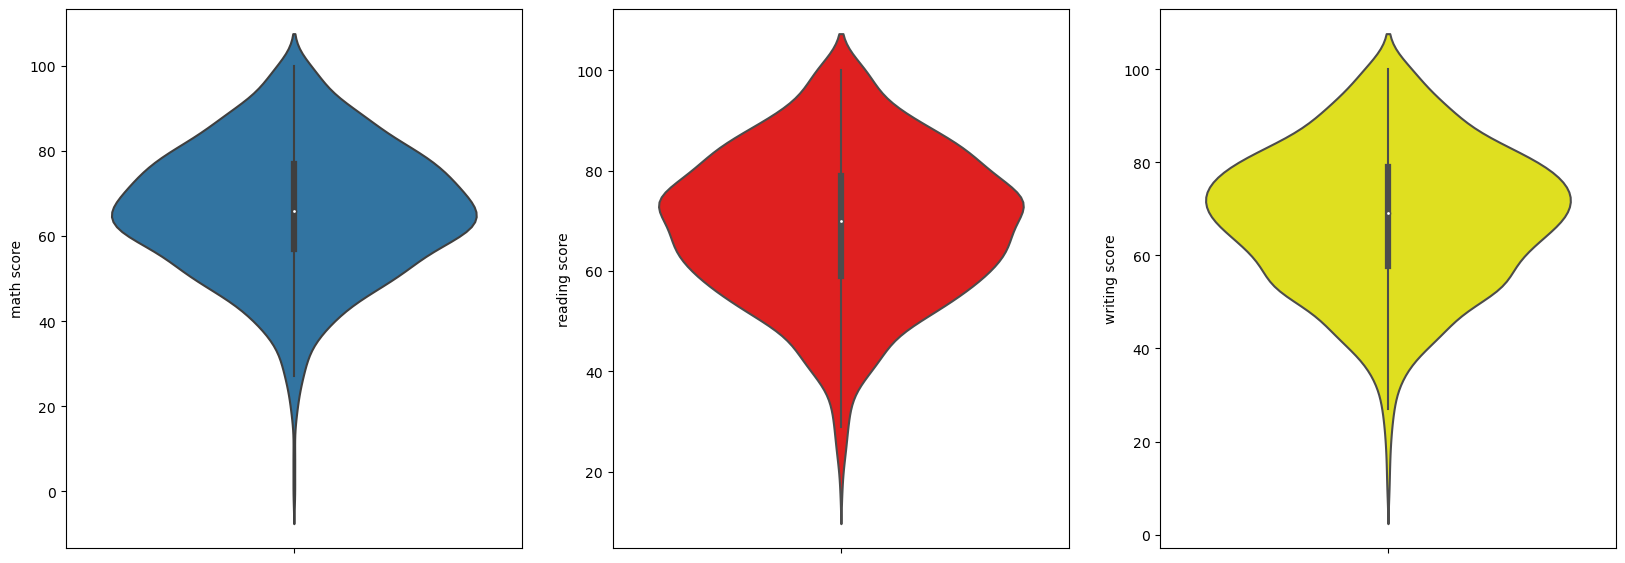

In [28]:
plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(131)
sns.violinplot(data = df, y = 'math score')
plt.subplot(132)
sns.violinplot(data = df, y = 'reading score', color = 'red')
plt.subplot(133)
sns.violinplot(data = df, y = 'writing score', color = 'yellow')
plt.show()

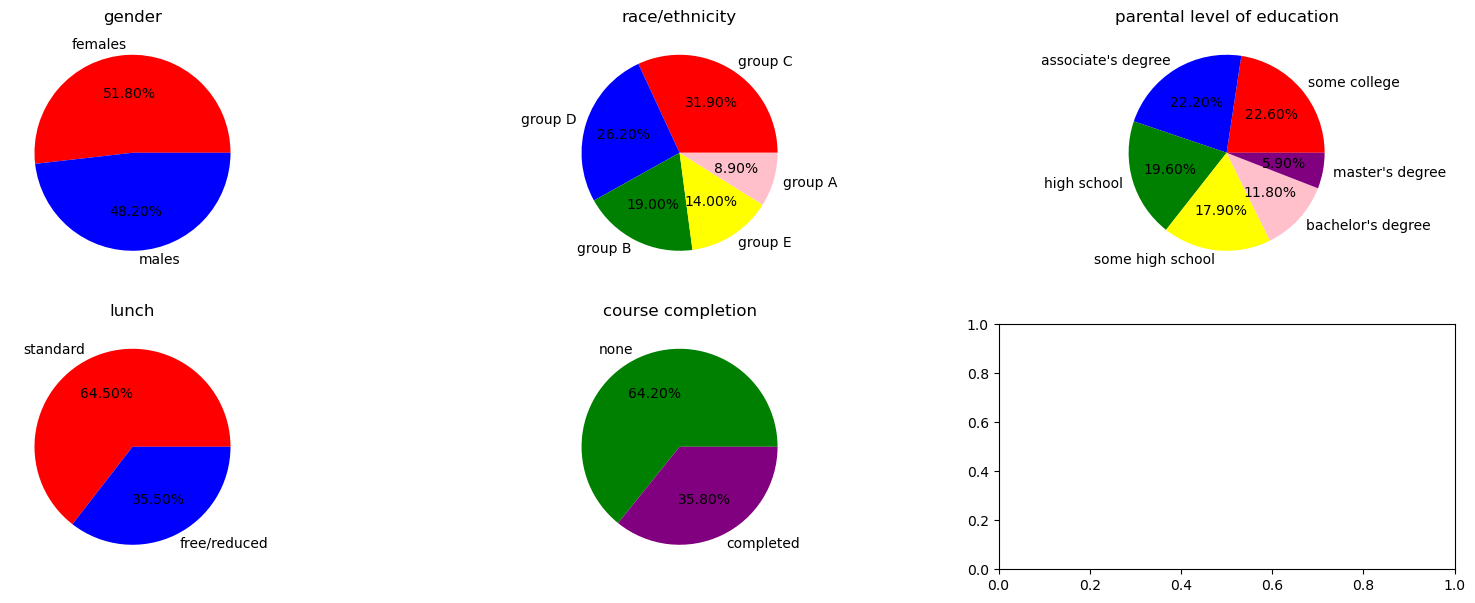

In [29]:
plt.subplots(2, 3, figsize = (20, 7))
plt.subplot(231)
plt.title('gender')
plt.pie(x = df['gender'].value_counts(), colors = ['red', 'blue'], labels = ['females', 'males'], autopct = '%.2f%%')

plt.subplot(232)
plt.title('race/ethnicity')
plt.pie(x = df['race/ethnicity'].value_counts(), colors = ['red', 'blue', 'green', 'yellow', 'pink'], labels = ['group C', 'group D', 'group B', 'group E', 'group A'], autopct = '%.2f%%')

plt.subplot(233)
plt.title('parental level of education')
plt.pie(x = df['parental level of education'].value_counts(), colors = ['red', 'blue', 'green', 'yellow', 'pink', 'purple'], labels = ['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"], autopct = '%.2f%%')

plt.subplot(234)
plt.title('lunch')
plt.pie(x = df['lunch'].value_counts(), colors = ['red', 'blue'], labels = ['standard', 'free/reduced'], autopct = '%.2f%%')

plt.subplot(235)
plt.title('course completion')
plt.pie(x = df['test preparation course'].value_counts(), colors = ['green', 'purple'], labels = ['none', 'completed'], autopct = '%.2f%%')
plt.show()

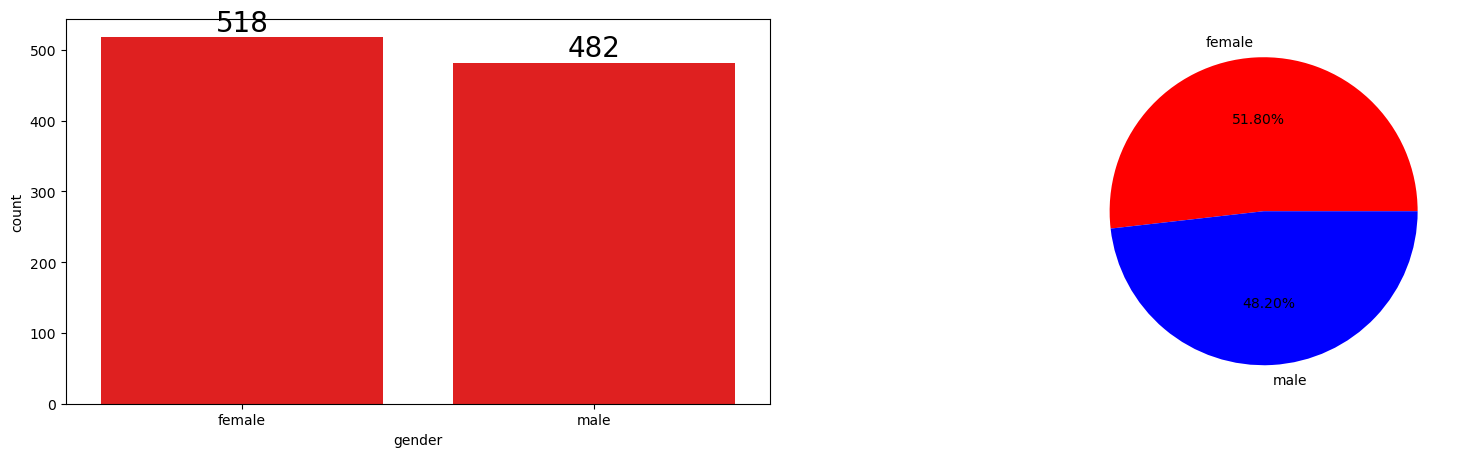

In [77]:
f, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.subplot(121)
sns.countplot(data = df, x = 'gender', color = 'red')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
plt.subplot(122)
plt.pie(x = df['gender'].value_counts(), labels = ['female', 'male'], colors = ['red', 'blue'], autopct = '%.2f%%', )
plt.show()

In [102]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [162]:
gender_group['gender'] = ['female', 'male']

In [163]:
gender_group.rename(columns = {'Total_score':'tol_score_avg'}, inplace = True)

In [164]:
gender_group

,math score,reading score,writing score,tol_score_avg,average,gender
gender,,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498,female
male,68.728216,65.473029,63.311203,197.512448,65.837483,male


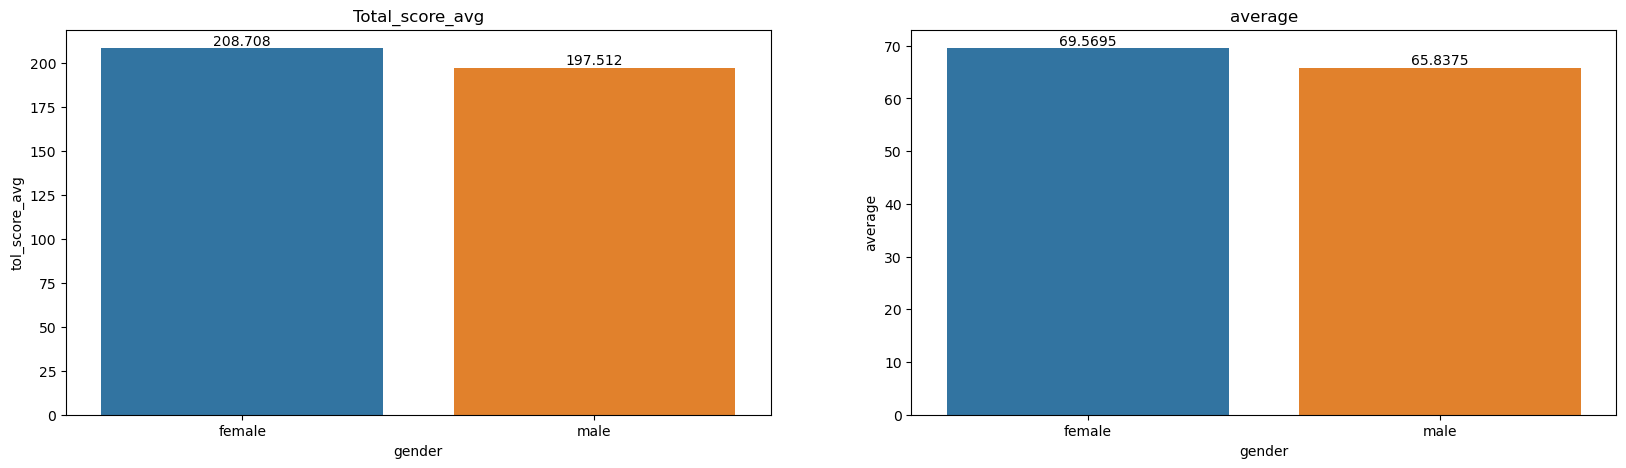

In [165]:
fig, ax = plt.subplots(1, 2, figsize =(20, 5))
plt.subplot(121)
plt.title('Total_score_avg')
sns.barplot(data = gender_group , x = 'gender', y = 'tol_score_avg')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

plt.subplot(122)
plt.title('average')
sns.barplot(data = gender_group, x = 'gender', y = 'average')
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

plt.show()

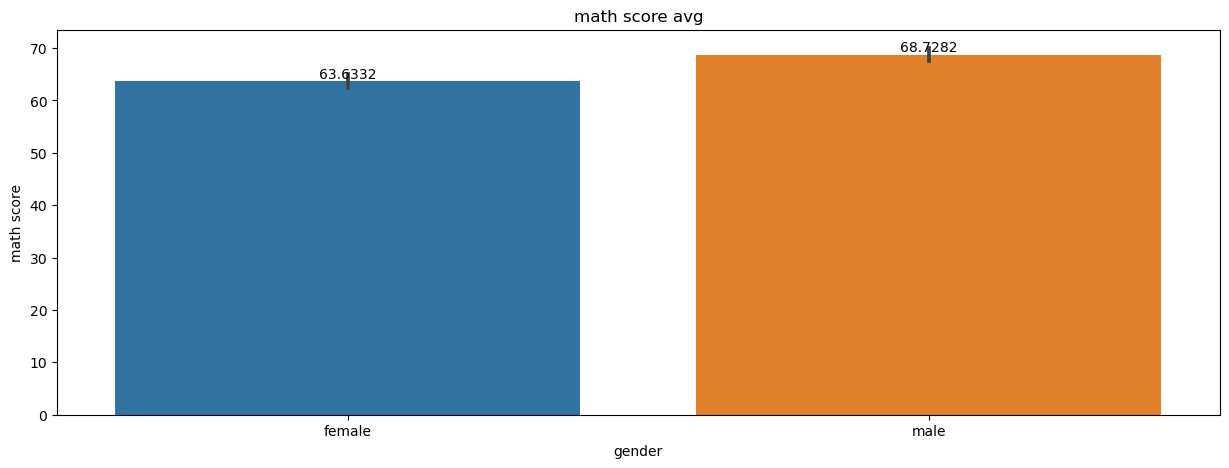

In [176]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
plt.subplot(111)
plt.title('math score avg')
sns.barplot(data = df, x = 'gender', y = 'math score')
for container in ax.containers:
    ax.bar_label(container, color = 'black', size = 10)
    
plt.show()

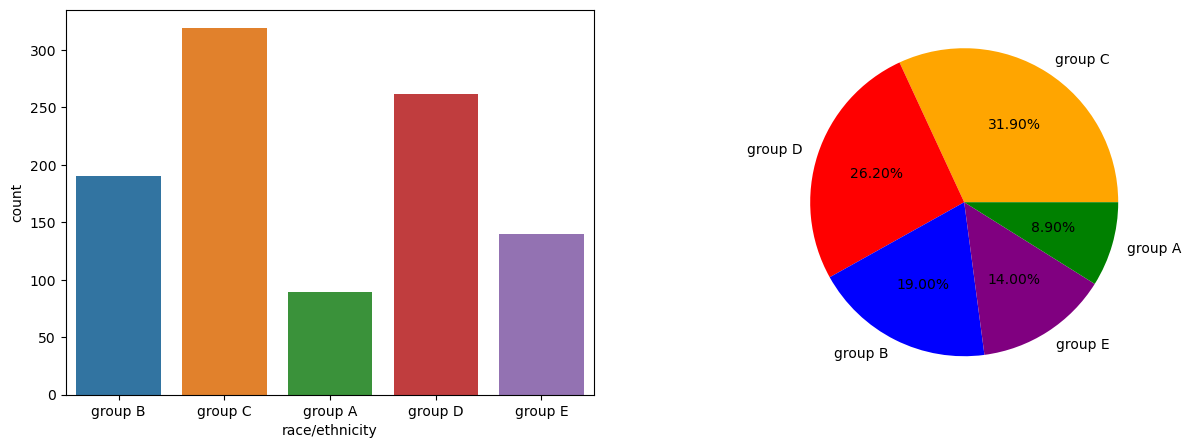

In [200]:
fig, ax = plt.subplots(1, 2 , figsize = (15, 5))
plt.subplot(121)
sns.countplot(data = df, x= df['race/ethnicity'])
plt.subplot(122)
plt.pie(x = df['race/ethnicity'].value_counts(), labels = ['group C', 'group D', 'group B', 'group E', 'group A'], autopct = '%.2f%%', colors =['orange', 'red', 'blue', 'purple', 'green'])
plt.show()

In [201]:
race_ethnicity = df.groupby('race/ethnicity').mean()
race_ethnicity

,math score,reading score,writing score,Total_score,average
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


In [206]:
race_ethnicity['race-ethnicity'] = ['group A', 'group B', 'group C', 'group D', 'group E']

In [207]:
race_ethnicity

,math score,reading score,writing score,Total_score,average,race-ethnicity
race/ethnicity,,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509,group A
group B,63.452632,67.352632,65.600000,196.405263,65.468421,group B
group C,64.463950,69.103448,67.827586,201.394984,67.131661,group C
group D,67.362595,70.030534,70.145038,207.538168,69.179389,group D
group E,73.821429,73.028571,71.407143,218.257143,72.752381,group E


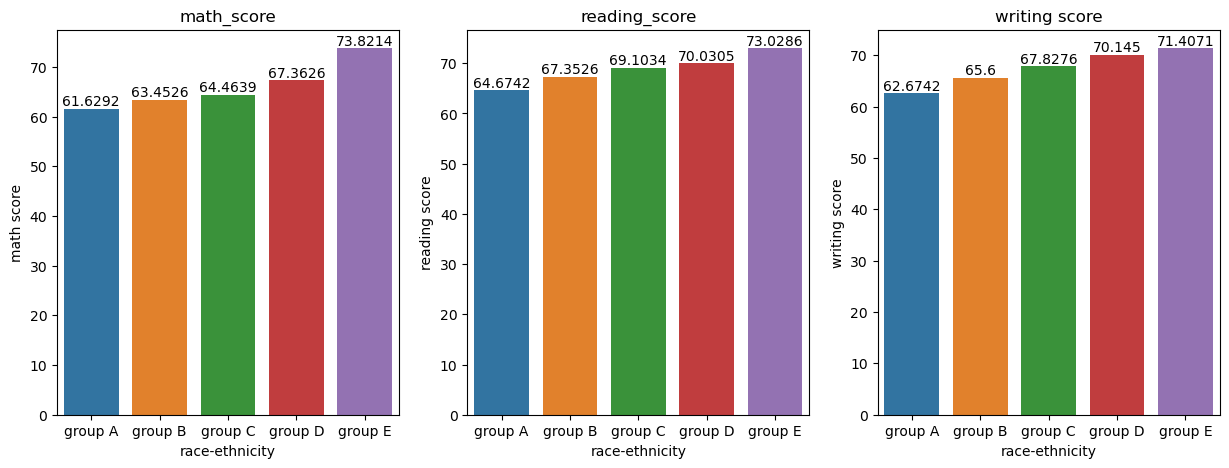

In [220]:
fig , ax = plt.subplots(1, 3, figsize = (15, 5))
plt.subplot(131)
plt.title('math_score')
sns.barplot(data = race_ethnicity, x = 'race-ethnicity', y = 'math score')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

plt.subplot(132)
plt.title('reading_score')
sns.barplot(data = race_ethnicity, x = 'race-ethnicity', y = 'reading score')
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

plt.subplot(133)
plt.title('writing score')
sns.barplot(data = race_ethnicity, x = 'race-ethnicity', y = 'writing score')
for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black' , size = 10)
    
plt.show()

In [234]:
parents_edu = df.groupby('parental level of education').mean()
parents_edu

,math score,reading score,writing score,Total_score,average
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729
high school,62.137755,64.704082,62.448980,189.290816,63.096939
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870
some college,67.128319,69.460177,68.840708,205.429204,68.476401
some high school,63.497207,66.938547,64.888268,195.324022,65.108007


In [245]:
parents_edu['parents-education'] = ["associate's degree", "bachelor's degree", "high school", "master's degree", 'some college', 'some high school']

In [258]:
parents_edu

,math score,reading score,writing score,Total_score,average,parents-education
parental level of education,,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.569069,associate's degree
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923729,bachelor's degree
high school,62.137755,64.704082,62.448980,189.290816,63.096939,high school
master's degree,69.745763,75.372881,75.677966,220.796610,73.598870,master's degree
some college,67.128319,69.460177,68.840708,205.429204,68.476401,some college
some high school,63.497207,66.938547,64.888268,195.324022,65.108007,some high school


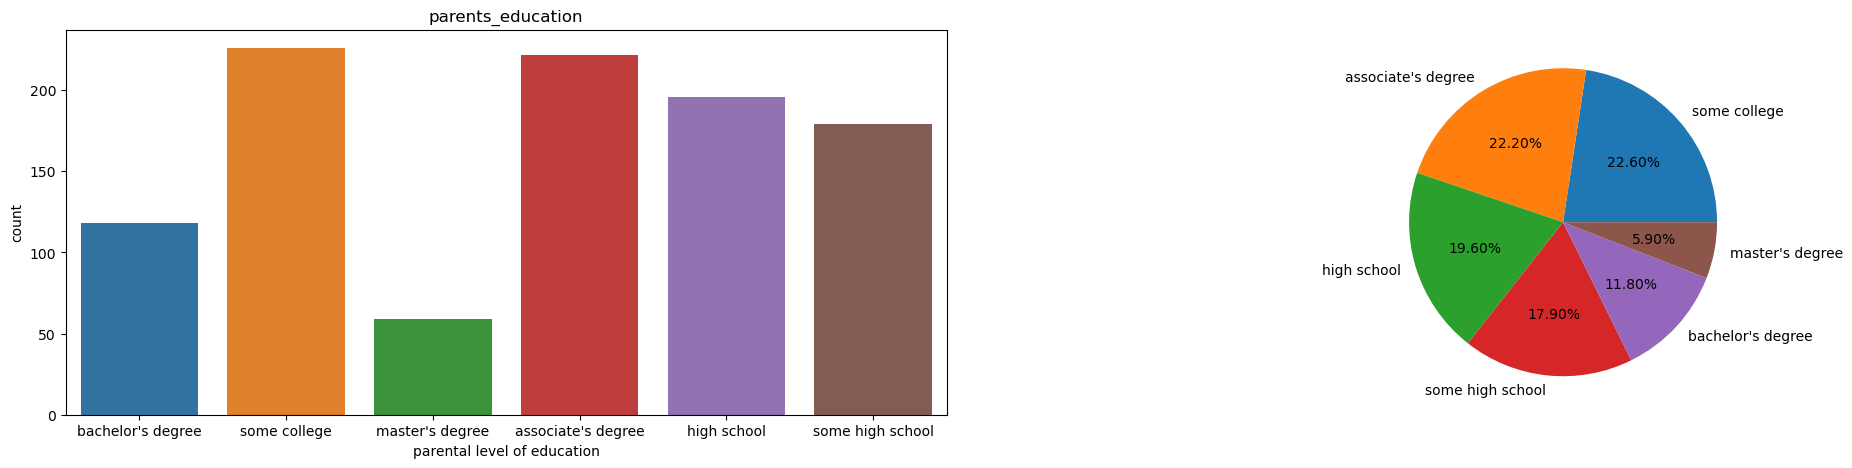

In [259]:
fig, ax = plt.subplots(1, 2, figsize = (25, 5))
plt.subplot(121)
plt.title('parents_education')
sns.countplot(data = df, x = 'parental level of education')
plt.subplot(122)
plt.pie(x = df['parental level of education'].value_counts(), labels = ['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"], autopct = '%.2f%%')
plt.show()

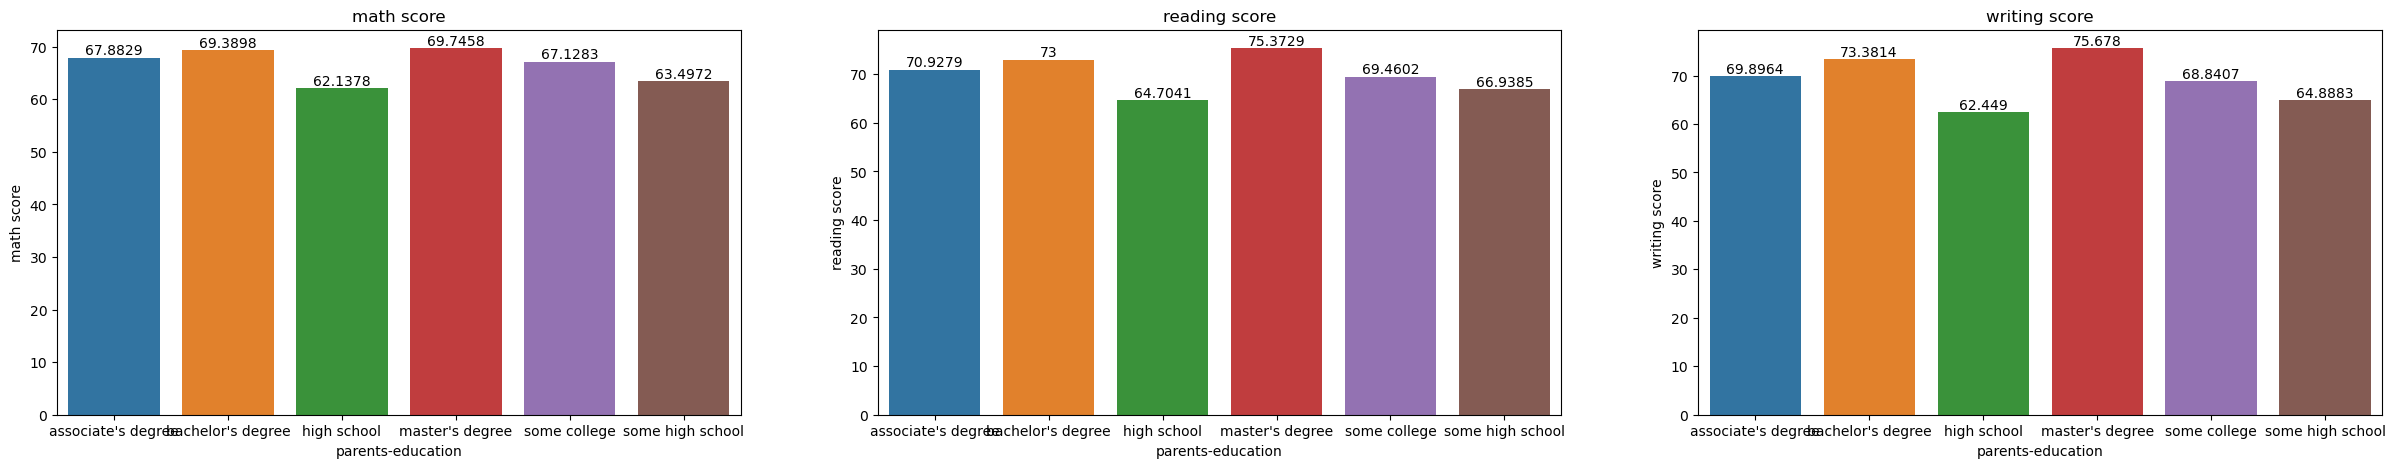

In [260]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5))
plt.subplot(131)
plt.title('math score')
sns.barplot(data = parents_edu, x = parents_edu['parents-education'], y = 'math score')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 10)

plt.subplot(132)
plt.title('reading score')
sns.barplot(data = parents_edu, x = parents_edu['parents-education'], y = 'reading score')
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 10)

plt.subplot(133)
plt.title('writing score')
sns.barplot(data = parents_edu, x = parents_edu['parents-education'], y = 'writing score')
for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 10)
plt.show()

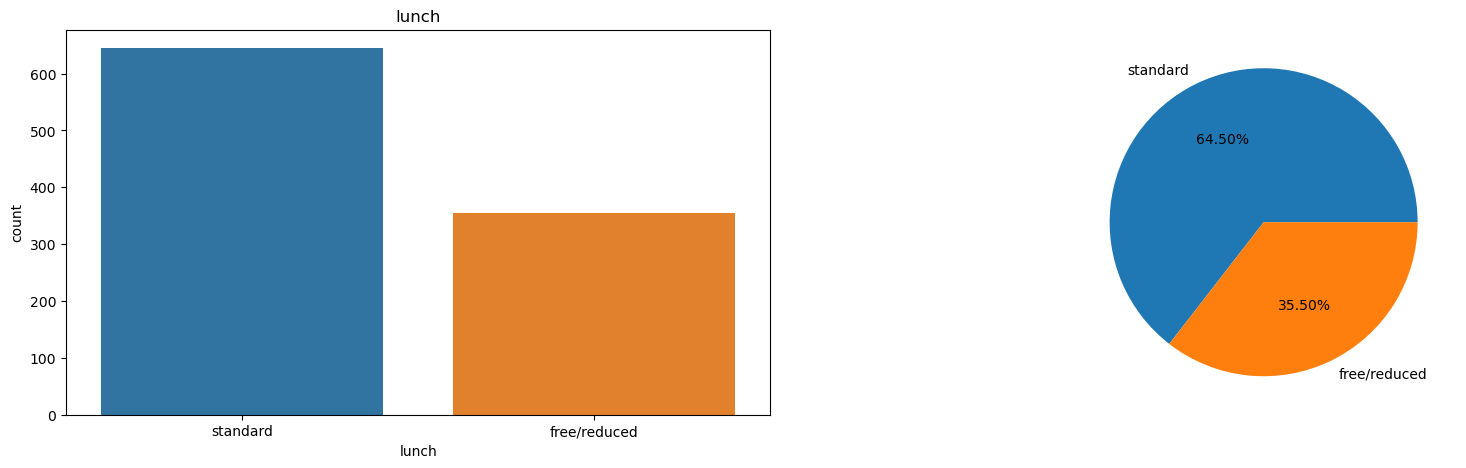

In [265]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
plt.subplot(121)
plt.title('lunch')
sns.countplot(data = df, x = 'lunch')
plt.subplot(122)
plt.pie(x = df.lunch.value_counts(), labels=['standard', 'free/reduced'], autopct = '%.2f%%')
plt.show()

In [267]:
lunch_effect = df.groupby('lunch').mean()
lunch_effect

,math score,reading score,writing score,Total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


In [271]:
lunch_effect['preferred_lunch'] = ['free/reduced', 'standard']

In [272]:
lunch_effect

,math score,reading score,writing score,Total_score,average,preferred_lunch
lunch,,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061,free/reduced
standard,70.034109,71.654264,70.823256,212.511628,70.837209,standard


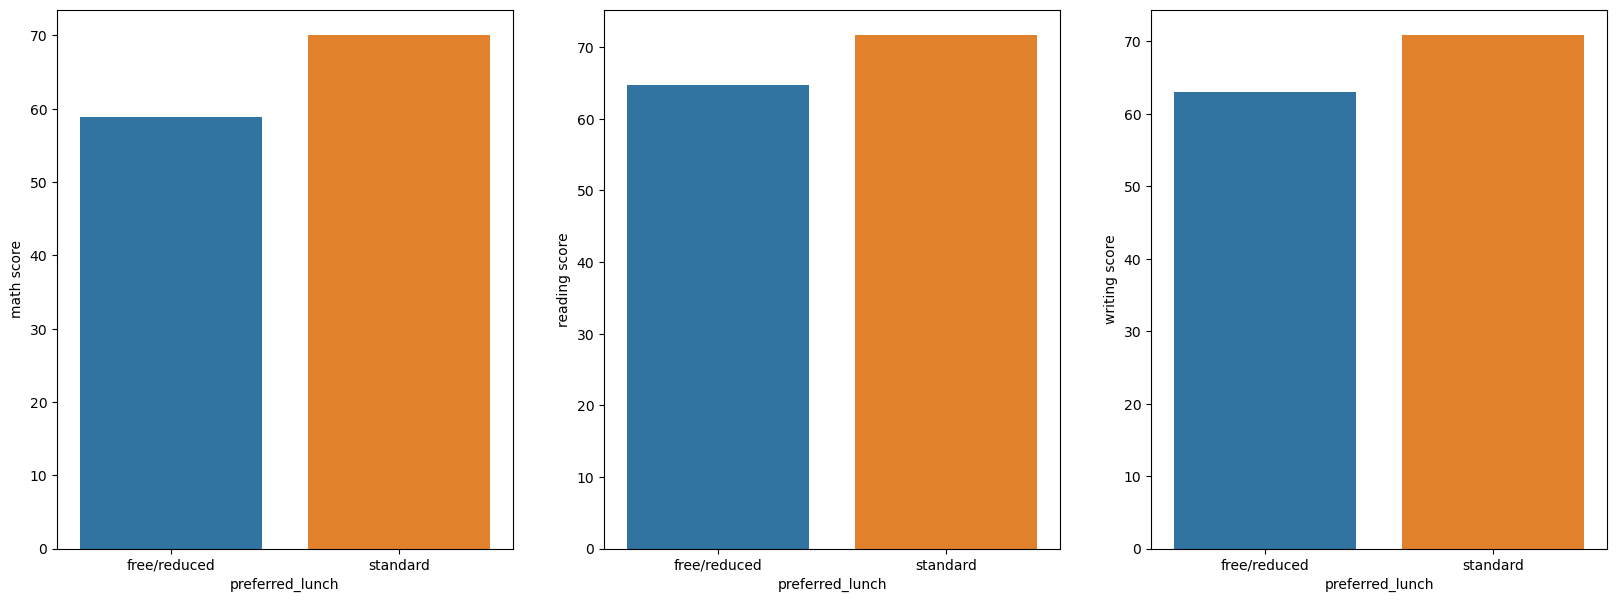

In [274]:
fig, ax = plt.subplots(1, 3, figsize = (20, 7))
plt.subplot(131)
sns.barplot(data = lunch_effect, x = 'preferred_lunch', y = 'math score')
plt.subplot(132)
sns.barplot(data = lunch_effect, x = 'preferred_lunch', y  = 'reading score')
plt.subplot(133)
sns.barplot(data = lunch_effect, x = 'preferred_lunch', y = 'writing score')
plt.show()

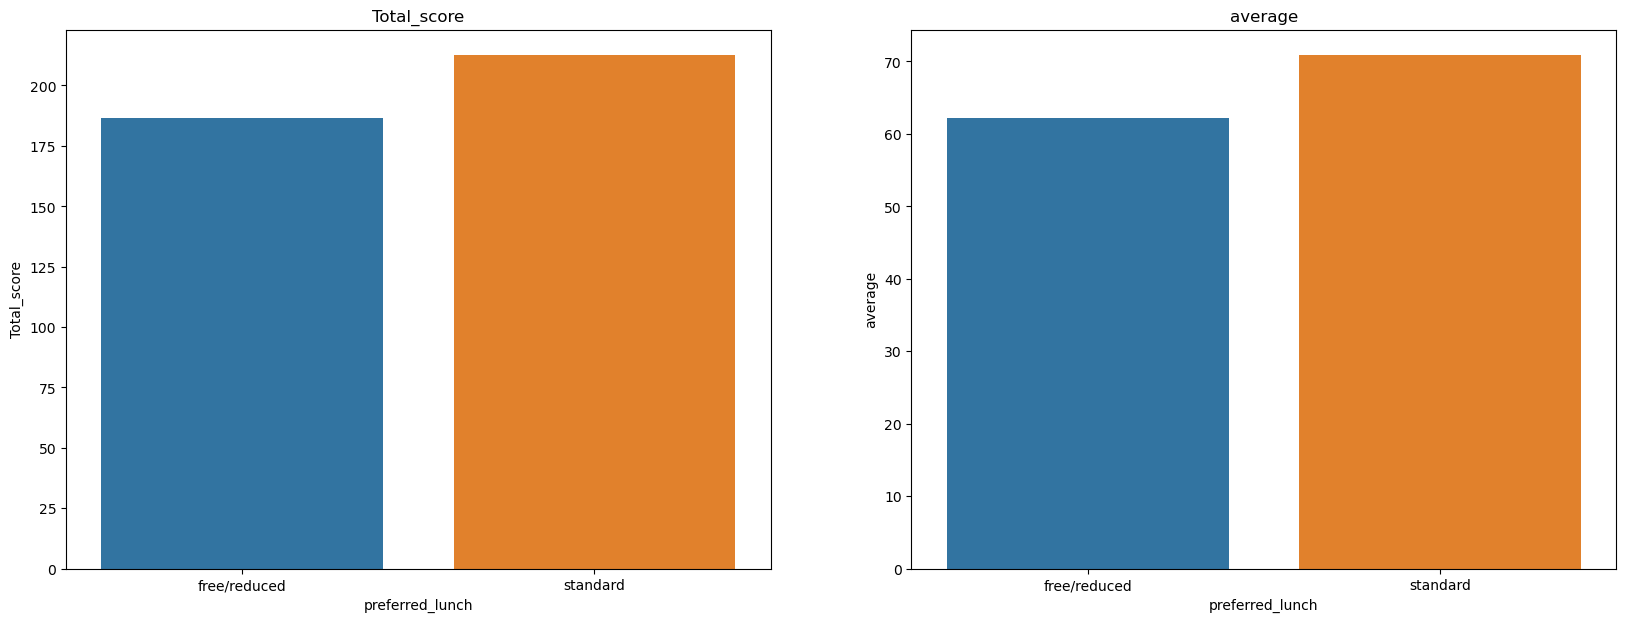

In [277]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
plt.subplot(121)
plt.title("Total_score")
sns.barplot(data = lunch_effect, x = 'preferred_lunch', y = 'Total_score')
plt.subplot(122)
plt.title("average")
sns.barplot(data = lunch_effect, x = 'preferred_lunch', y = 'average')
plt.show()

In [280]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'average'],
      dtype='object')

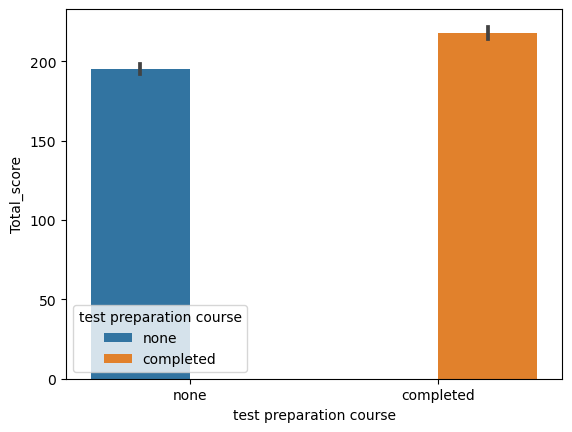

In [290]:
sns.barplot(data = df,  x = 'test preparation course', y = 'Total_score', hue = 'test preparation course')
plt.show()

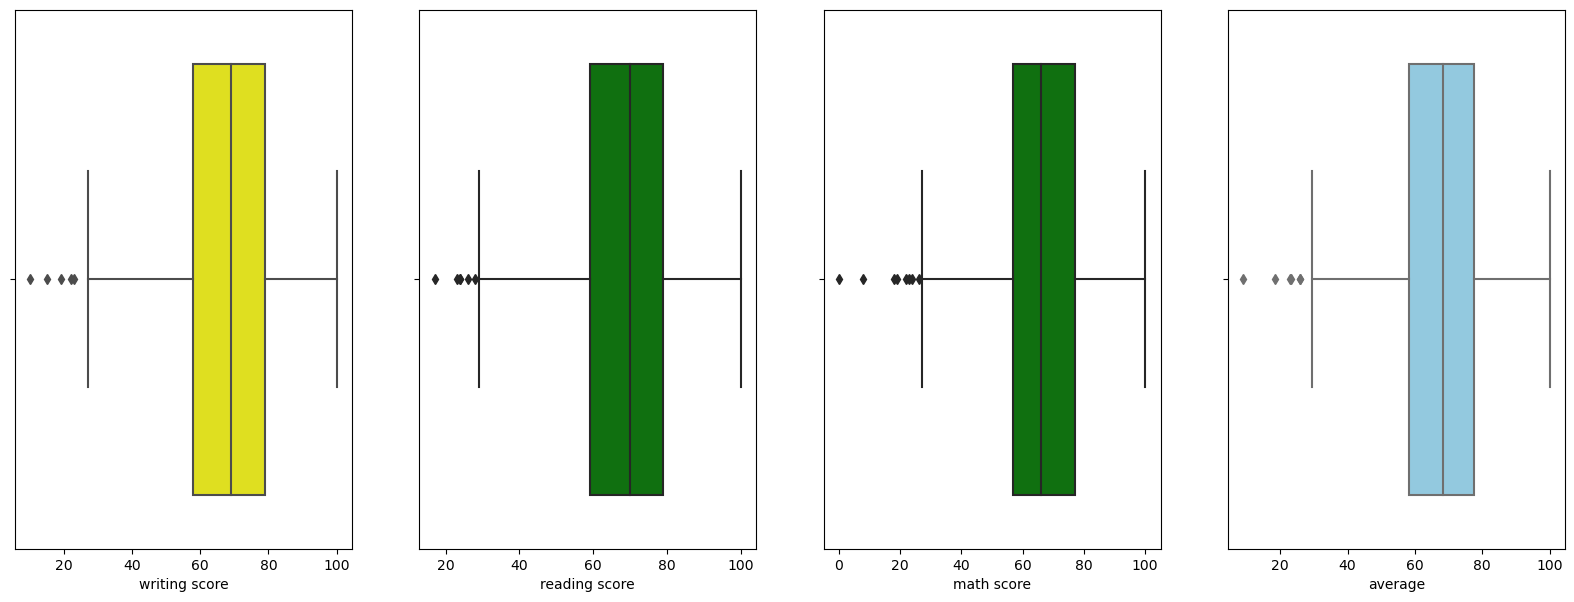

In [296]:
fig, ax = plt.subplots(1, 4, figsize = (20, 7))
plt.subplot(141)
sns.boxplot(data = df, x = 'writing score', color = 'yellow')
plt.subplot(142)
sns.boxplot(data = df, x = 'reading score', color = 'green')
plt.subplot(143)
sns.boxplot(data = df, x = 'math score', color = 'green')
plt.subplot(144)
sns.boxplot(data = df, x = 'average', color = 'skyblue')
plt.show()

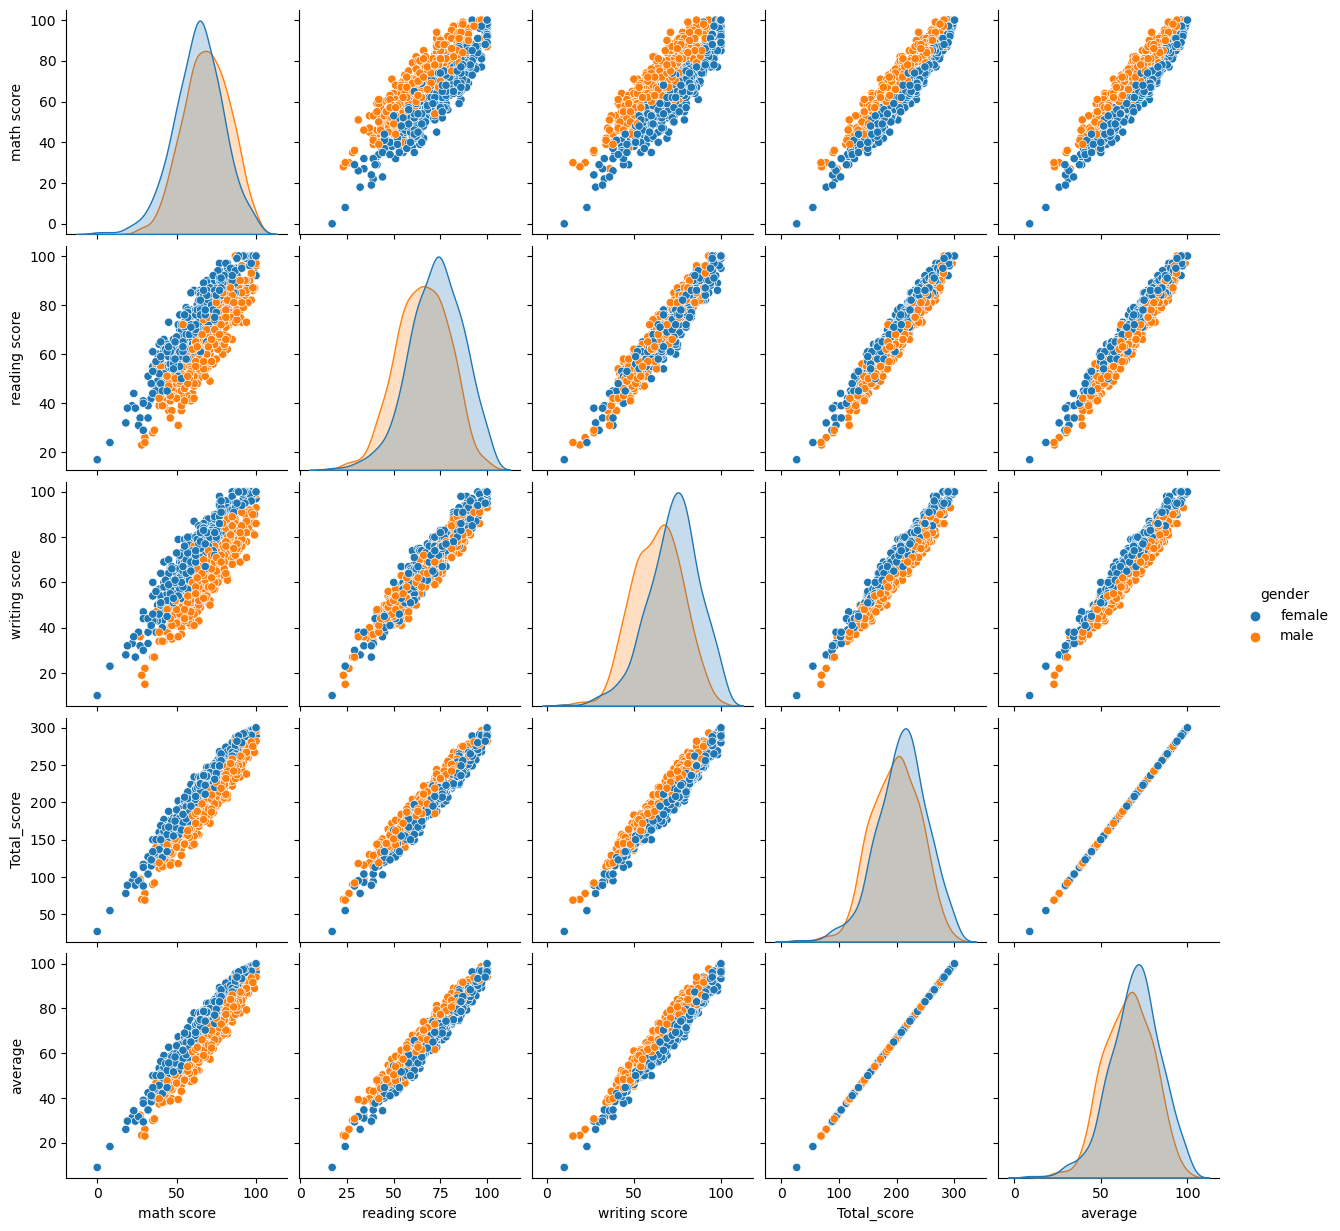

In [297]:
sns.pairplot(data = df, hue = 'gender')
plt.show()